# The goal of this notebook is to download an mp3 from NPR's embedded and then transcribe it using pocketsphinx.

In [1]:
from IPython.display import Audio
from pydub import AudioSegment
import glob
from math import ceil
import os
import json
import requests
import csv
import sys
import speech_recognition as sr
r = sr.Recognizer()

In [2]:
#!wget http://play.podtrac.com/npr-510311/npr.mc.tritondigital.com/NPR_510311/media/anon.npr-mp3/npr/embd/2016/05/20160505_embd_embedded_final_audio__-_we_found_joy_1156.mp3

In [3]:
def transform_mp3_wav(AUDIO_FILENAME, AUDIO_SEGMENT_SECONDS):
    filename = AUDIO_FILENAME.replace('.mp3','')
    with open(AUDIO_FILENAME):
        audio = AudioSegment.from_mp3(AUDIO_FILENAME)
        xs = 0
        while xs < audio.duration_seconds:
            ys = min(xs + AUDIO_SEGMENT_SECONDS, ceil(audio.duration_seconds))
            fname = str(xs).rjust(5, '0') + '-' + str(ys).rjust(5, '0') + '.wav'
            audio[xs*1000:ys*1000].export(os.getcwd() + '/' + filename + fname, format='wav')
            print("Saved", fname)
            xs = ys

In [4]:
os.chdir('/Users/sheldon/podcasts/speech_notebook/')
os.getcwd()

'/Users/sheldon/podcasts/speech_notebook'

In [5]:
transform_mp3_wav('embedded_we_found_joy.mp3', 300)

('Saved', '00000-00300.wav')
('Saved', '00300-00600.wav')
('Saved', '00600-00900.wav')
('Saved', '00900-01200.wav')
('Saved', '01200-01500.wav')
('Saved', '01500-1728.0.wav')


In [6]:
wav_list = glob.glob('embedded_we_found_joy*')
wav_list = filter(lambda x: '.mp3' not in x, wav_list)

In [7]:
wav_list

['embedded_we_found_joy00000-00300.wav',
 'embedded_we_found_joy00300-00600.wav',
 'embedded_we_found_joy00600-00900.wav',
 'embedded_we_found_joy00900-01200.wav',
 'embedded_we_found_joy01200-01500.wav',
 'embedded_we_found_joy01500-1728.0.wav']

In [8]:
%%time
trans_list = []
transcription = None
for wav_file in wav_list: 
    print 'transcribing: ' + wav_file
    with sr.AudioFile(wav_file) as source:
        audio = r.record(source)
        transcription = r.recognize_sphinx(audio)
        print 'transcription completed'
    trans_list.extend(transcription)

transcribing: embedded_we_found_joy00000-00300.wav
transcription completed
transcribing: embedded_we_found_joy00300-00600.wav
transcription completed
transcribing: embedded_we_found_joy00600-00900.wav
transcription completed
transcribing: embedded_we_found_joy00900-01200.wav
transcription completed
transcribing: embedded_we_found_joy01200-01500.wav
transcription completed
transcribing: embedded_we_found_joy01500-1728.0.wav
transcription completed
CPU times: user 28min 6s, sys: 17.3 s, total: 28min 24s
Wall time: 29min 7s


In [15]:
transcription = ''.join(trans_list)

In [16]:
file = open('transcription_cmu_full.txt','w')
file.write(transcription)
file.close()

## Baseline comparison of the results

In [2]:
from nltk.corpus import stopwords
from collections import Counter
import pandas as pd
import numpy as np
import nltk.data
from __future__ import division  # Python 2 users only
import nltk, re, pprint
from nltk import word_tokenize
%matplotlib inline

In [31]:
cmu_trans = open('transcription_cmu_full.txt','rU').read()
stop = set(stopwords.words('english'))
grammar_symbols = [',','"',"'","."]
def tokenize_and_lower(textfile):
    
    lower = [w.lower() for w in tokens]
    filtered_words = [word for word in lower if word not in stop]
    remove_contractions = [word for word in filtered_words if "'" not in word]
    remove_periods = [word for word in remove_contractions if "." not in word]
    tokens = word_tokenize(remove_periods)
    return tokens


cmu = tokenize_and_lower(cmu_trans)
'''
cmu = pd.Series.to_frame(cmu)
cmu.columns = [['words']]
cmu = cmu.groupby('words').size().reset_index()
cmu.columns = [['words','count']]
'''

"\ncmu = pd.Series.to_frame(cmu)\ncmu.columns = [['words']]\ncmu = cmu.groupby('words').size().reset_index()\ncmu.columns = [['words','count']]\n"

In [32]:
cmu

['support',
 'comes',
 'hot',
 'spot',
 'ask',
 'todd',
 'spot',
 'usual',
 'message',
 'goes',
 'replied',
 'dear',
 'npr',
 'love',
 'great',
 'stories',
 'really',
 'wan',
 'na',
 'say',
 'thank',
 'sharing',
 'fan',
 'club',
 'spa',
 'kelly',
 'recovers',
 'endure',
 'typecast',
 'take',
 'story',
 'news',
 'anchor',
 'deep',
 'week',
 'gon',
 'na',
 'something',
 'little',
 'different',
 'listening',
 'pod',
 'castro',
 'narrow',
 'first',
 'episode',
 'least',
 'budget',
 'time',
 'town',
 'called',
 'boston',
 'indiana',
 'people',
 'addicted',
 'destroy',
 'called',
 'pan',
 'town',
 'center',
 'biggest',
 'outbreaks',
 'years',
 'many',
 'people',
 'sharing',
 'needles',
 'sunset',
 'episode',
 'lot',
 'told',
 'us',
 'know',
 'intimate',
 'happen',
 'people',
 'met',
 'austin',
 'bevan',
 'samantha',
 'jasmine',
 'joe',
 'way',
 'sell',
 'episode',
 'going',
 'back',
 'indiana',
 'tannenbaum',
 'wearing',
 'number',
 'something',
 'really',
 'want',
 'find',
 'enjoying',
 'st

In [33]:
type(cmu)
join_words = " ".join(cmu)

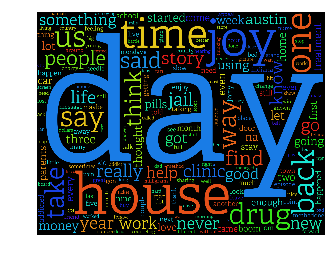

In [34]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS




wordcloud = WordCloud(
                      font_path='/Users/sheldon/Library/Fonts/Adelle_light.otf',
                      stopwords=STOPWORDS,
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(join_words)

plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./my_twitter_wordcloud_1.png', dpi=300)
plt.show()